<a href="https://colab.research.google.com/github/IanPol0/DataScienceNetflix/blob/main/DataScienceNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LAS FUNCIONES EN CAMELCASE Y LAS VARIABLES EN SNAKECASE Y RESPETENLO
##Los subtitulos en '##', Los ejercicios en '###'

#Trabajo Práctico Netflix
Septiembre 2022

##Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/IanPol0/DataScienceNetflix/main/NetflixHistory.csv'
history = pd.read_csv(url)

##Delete devices not required

In [3]:
devices_remove = ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 
'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 
'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']

#delete devices not required
for device in devices_remove:
  print(len(history), device)
  history = history.drop(history.index[history['Device Type'] == device], inplace=False)
  history = history.reset_index(drop=True)

12997 Sony PS4
12953 Netflix Windows App - Cadmium Windows Mobile
12888 Apple iPhone 6s
9203 Apple iPhone 7 Plus (CDMA)
8741 Chrome PC (Cadmium)
7569 Samsung 2015 NT14M DTV Smart TV
6847 iPhone 5S GSM
6292 Google Chromecast V3 Streaming Stick


##Adapt time

In [4]:
#returns hours, minutes and seconds in seconds
def toSeconds(time_str):
  h, m, s = time_str.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

##Divide series and movies

In [22]:
for i in range(len(history['Title'])):
  if history['Title'][i].__contains__('Temporada'):
    history['Type'][i] = 'serie'
  elif history['Title'][i].__contains__('Capítulo'): 
    history['Type'][i] = 'serie'
  elif history['Title'][i].__contains__('Season'): 
    history['Type'][i] = 'serie'
  elif history['Title'][i].__contains__('Clip'): 
    history['Type'][i] = 'serie'
  elif history['Title'][i].__contains__('Resumen'): 
    history['Type'][i] = 'serie'
  elif history['Title'][i].__contains__('Tráiler'): 
    history['Type'][i] = 'serie'
  else:
    history['Type'][i] = 'movie'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib

In [23]:
history[history['Type']=='movie']

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Type
89,89,Chona,2022-07-16 22:28:48,01:40:03,NaN,Mr. Holmes,NaN,Apple Apple TV 4 Apple TV,01:39:52,01:39:52,AR (Argentina),movie
134,134,Chona,2022-05-01 00:15:24,00:00:17,Autoplayed: user action: None;,The Spy: Limited Series_hook_03_16x9,HOOK,Apple Apple TV 4 Apple TV,00:00:18,00:00:18,AR (Argentina),movie
135,135,Chona,2022-05-01 00:14:32,00:00:21,Autoplayed: user action: None;,Shutter Island_hook_primary_16x9,HOOK,Apple Apple TV 4 Apple TV,00:00:22,00:00:22,AR (Argentina),movie
138,138,Chona,2022-05-01 00:12:46,00:00:26,Autoplayed: user action: None;,Drive_hook_06_16x9,HOOK,Apple Apple TV 4 Apple TV,00:00:26,00:00:26,AR (Argentina),movie
145,145,Chona,2022-04-17 02:08:02,00:00:06,Autoplayed: user action: None;,Fast & Furious Presents: Hobbs & Shaw_hook_01_...,HOOK,Apple Apple TV 4 Apple TV,00:00:07,00:00:07,AR (Argentina),movie
...,...,...,...,...,...,...,...,...,...,...,...,...
6162,12868,Chona,2015-01-20 00:49:39,01:29:21,NaN,Flubber y el profesor chiflado,NaN,Apple TV 3 (revised),01:29:21,01:29:21,AR (Argentina),movie
6163,12869,Chona,2015-01-20 00:20:46,00:00:32,NaN,Toy Story: una historia de terror,NaN,Apple TV 3 (revised),00:21:39,00:21:39,AR (Argentina),movie
6188,12894,Chona,2015-01-16 00:48:04,01:34:02,NaN,Pesos pesados,NaN,Apple TV 3 (revised),01:34:01,01:34:01,AR (Argentina),movie
6189,12895,Chona,2015-01-16 00:30:53,00:00:01,NaN,Pesos pesados,NaN,Apple TV 3 (revised),00:00:01,Not latest view,AR (Argentina),movie


In [39]:
history[history['Type']=='serie']

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Type
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina),serie
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina),serie
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina),serie
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina),serie
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina),serie
...,...,...,...,...,...,...,...,...,...,...,...,...
6286,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina),serie
6287,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina),serie
6288,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina),serie
6289,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina),serie


In [38]:
'''
series = history[history['Type'] == 'serie']
movies = history[history['Type'] == 'movie']
del history['Type'], series['Type'], movies['Type']
'''

"\nseries = history[history['Type'] == 'serie']\nmovies = history[history['Type'] == 'movie']\ndel history['Type'], series['Type'], movies['Type']\n"

##Exercises

###a) Contabilizar el dispositivo con el que más títulos se reprodujeron.

In [6]:
devices_compare = {}

for dev in history['Device Type']:
  if dev not in devices_compare:
    devices_compare[dev] = 1
  else:
    devices_compare[dev] += 1

max(devices_compare, key=devices_compare.get)

'Apple Apple TV 4 Apple TV'

###b) Encontrar la película con más ocurrencias y la película con mayor duración total.

In [29]:
movies_compare = {}

for mov in history.index:
  if history["Type"][mov] == "movie":
    if history["Title"][mov] not in movies_compare:
      movies_compare[history["Title"][mov]] = 1
    else:
      movies_compare[history["Title"][mov]] += 1

max(movies_compare, key=movies_compare.get)
#movies_compare

'Star Wars: El Imperio contraataca'

In [67]:
movies_duration = {}

for mov in history.index:
  if history["Type"][mov] == "movie":
    if history["Title"][mov] not in movies_duration:
      movies_duration[history["Title"][mov]] = toSeconds(history["Duration"][mov])
    else:
      movies_duration[history["Title"][mov]] += toSeconds(history["Duration"][mov])

max(movies_duration, key=movies_duration.get)
#movies_duration

'Star Wars: El Imperio contraataca'

###c) Generar un TOP “N” de series vistas y graficar.

####i) Por tiempo visto.

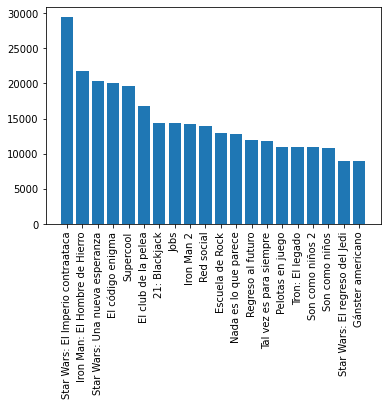

In [68]:
temp, final = {}, {}
temp = movies_duration
for i in range(20):
  final[max(temp, key=temp.get)] = temp[max(temp, key=temp.get)]
  temp[max(temp, key=temp.get)] = 0
keys = final.keys()
values = final.values()
plt.bar(keys, values)
plt.xticks(rotation = 90)
plt.show()

####ii) Por ocurrencias.

###d) Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.

###e) Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.